In [1]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

In [2]:
X = np.array([[-1,-1],[-2,-1],[-3,-2],[1,1],[2,1],[3,2]])
Xx = X[:,0]
Xy = X[:,1]

In [3]:
Xx

array([-1, -2, -3,  1,  2,  3])

In [4]:
Xy

array([-1, -1, -2,  1,  1,  2])

In [5]:
#無監督式學習器,用來找出鄰居
nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(X)

In [6]:
nbrs

NearestNeighbors(algorithm='ball_tree', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=1, n_neighbors=2, p=2, radius=1.0)

In [7]:
distances, indices = nbrs.kneighbors(X)

In [8]:
distances

array([[0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.41421356],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.41421356]])

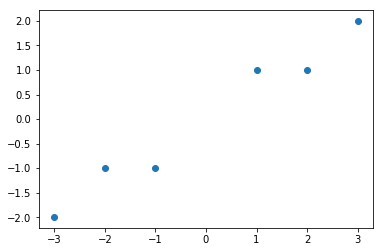

In [9]:
plt.scatter(Xx,Xy)
plt.show()

In [10]:
indices

array([[0, 1],
       [1, 0],
       [2, 1],
       [3, 4],
       [4, 3],
       [5, 4]], dtype=int64)

In [11]:
nbrs = NearestNeighbors(n_neighbors=3, algorithm='ball_tree').fit(X)
distances, indices = nbrs.kneighbors(X)

In [12]:
distances, indices = nbrs.kneighbors(X)

In [13]:
distances

array([[0.        , 1.        , 2.23606798],
       [0.        , 1.        , 1.41421356],
       [0.        , 1.41421356, 2.23606798],
       [0.        , 1.        , 2.23606798],
       [0.        , 1.        , 1.41421356],
       [0.        , 1.41421356, 2.23606798]])

In [14]:
indices

array([[0, 1, 2],
       [1, 0, 2],
       [2, 1, 0],
       [3, 4, 5],
       [4, 3, 5],
       [5, 4, 3]], dtype=int64)

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

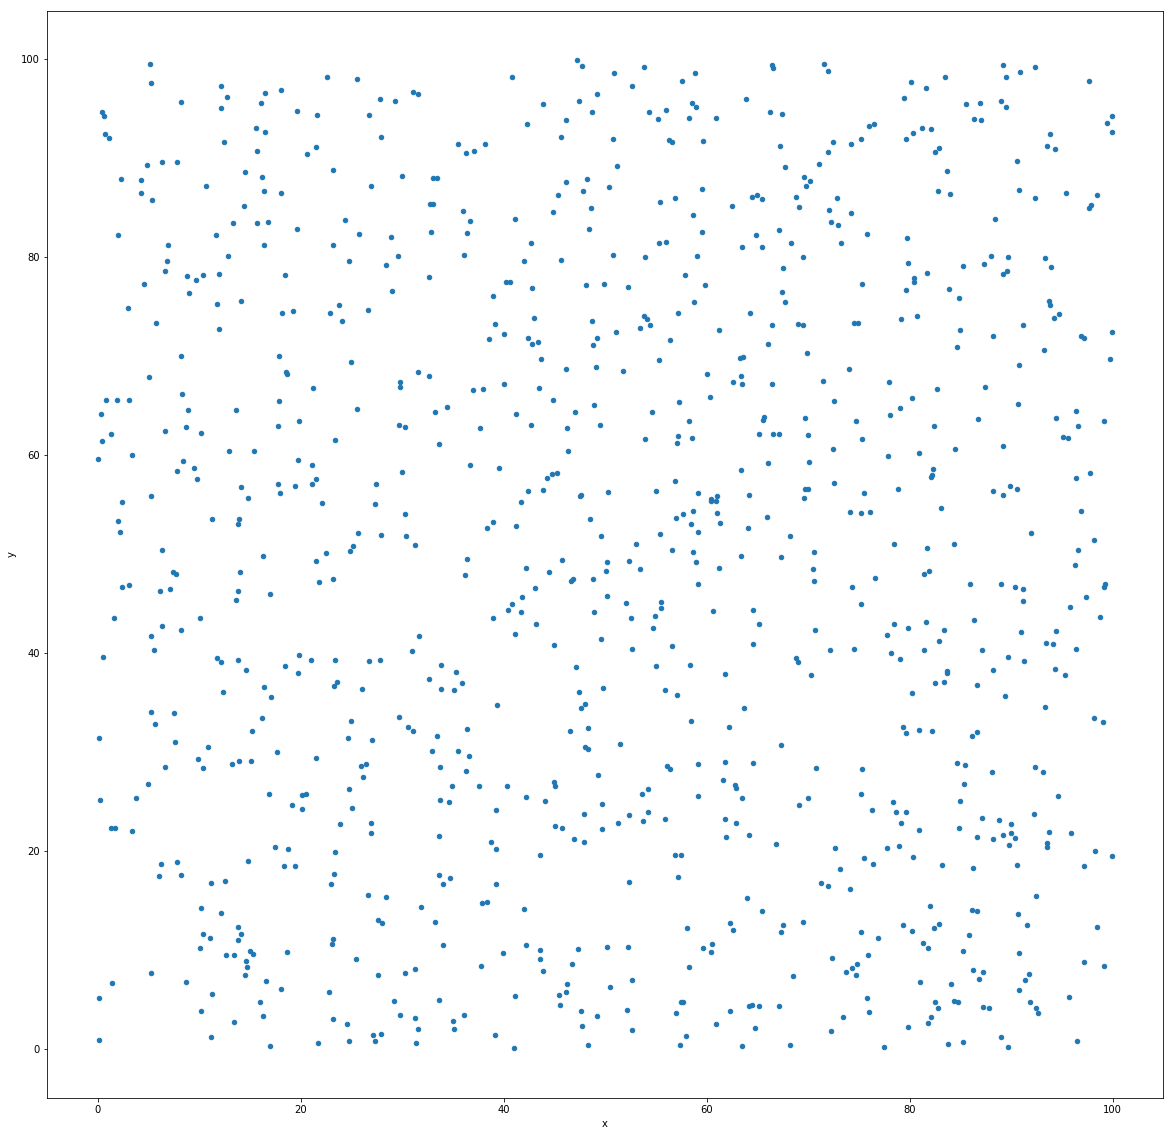

In [16]:
df = pd.DataFrame(np.random.random([1000,2])*100,columns=['x','y'])
df.plot(kind='scatter',x='x',y='y',figsize=(20,20))

In [17]:
#NearestNeighbors為無監督式學習
from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors( n_neighbors=10, algorithm='ball_tree', metric='euclidean' ).fit( df[['x', 'y']].values )

In [18]:
distances, indices = nbrs.kneighbors(df)
print(distances)
print(indices)

[[0.         0.49112959 1.83081646 ... 4.5199702  5.52772944 5.94725839]
 [0.         0.89372317 2.81140282 ... 6.47897117 6.63900276 6.73490351]
 [0.         2.70135642 2.70255747 ... 4.69617367 5.0257446  5.03285141]
 ...
 [0.         1.812525   2.21194903 ... 7.20800838 7.31074058 7.68508524]
 [0.         0.34512018 0.61752121 ... 4.22411899 4.91156079 5.49103969]
 [0.         0.67991032 1.83342029 ... 4.55998303 4.76654933 5.47776409]]
[[  0 239 156 ... 979  59 141]
 [  1 256 547 ... 671 851 333]
 [  2 135  36 ... 793 470 903]
 ...
 [997 392 224 ... 693  41 879]
 [998 784 145 ... 897 298 302]
 [999 870 532 ... 287 361 396]]


In [19]:
#找出與(50,50)最近距離的5筆資料
distance_50,indices_50 = nbrs.kneighbors([[50,50]],5)
indices_50.size

5

In [20]:
indices_50

array([[799, 258, 701, 326, 800]], dtype=int64)

In [21]:
distance_50

array([[0.81226923, 1.74776705, 1.90070176, 2.4467946 , 2.80507461]])

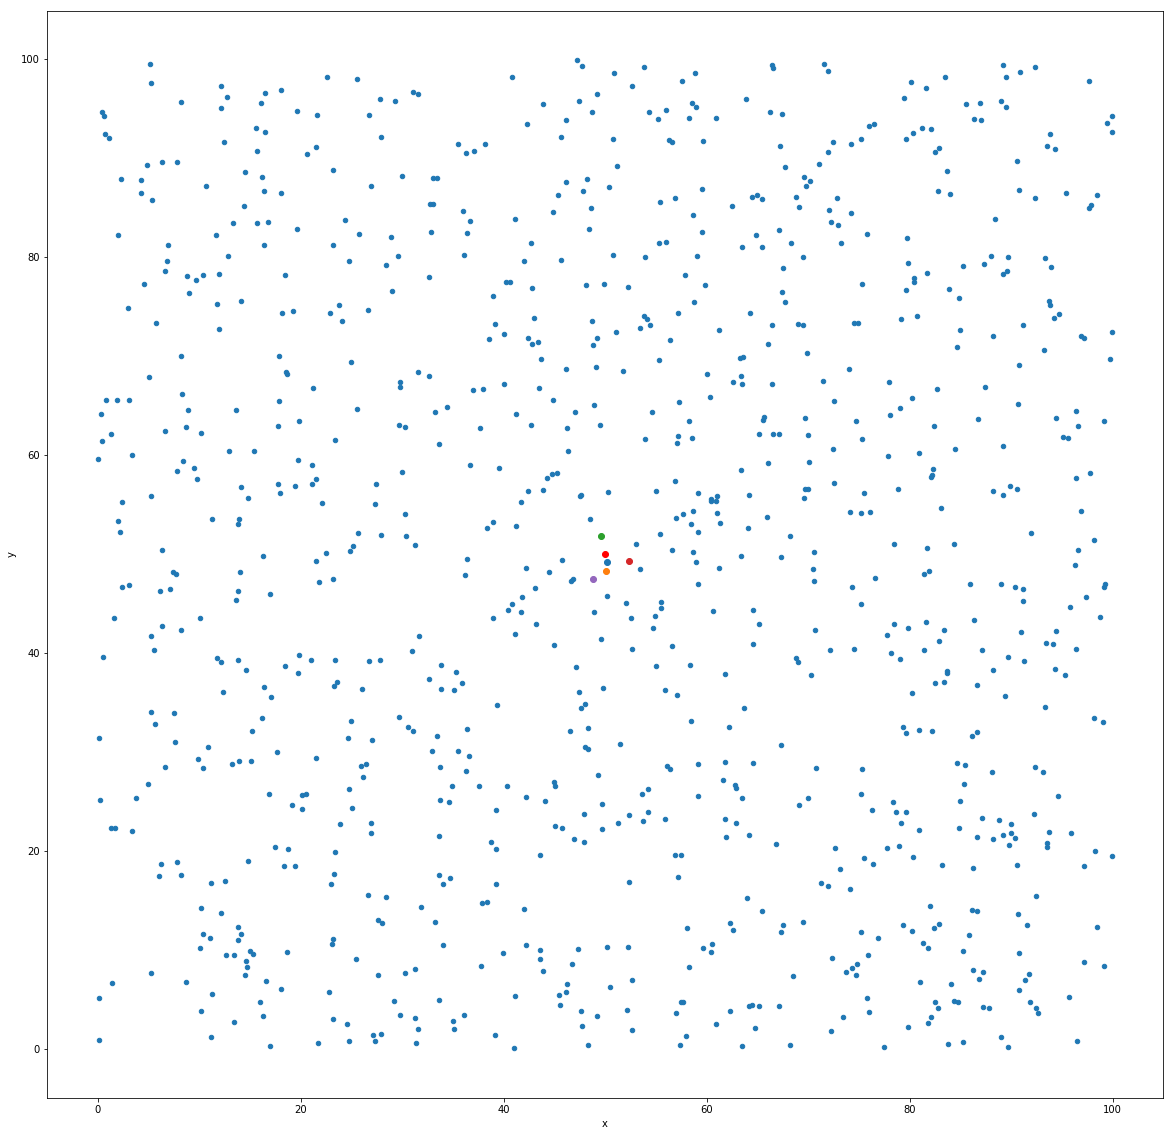

In [22]:
df.plot(kind='scatter',x='x',y='y',figsize=(20,20))
plt.scatter(50,50, color='red')
for i in range(indices_50.size):
    plt.scatter(df[['x']].iloc[indices_50[:,i]],df[['y']].iloc[indices_50[:,i]])

plt.show()

In [23]:
df[['x','y']].iloc[0]

x    95.096551
y    61.817095
Name: 0, dtype: float64

In [24]:
indices[0]

array([  0, 239, 156, 775, 652, 888, 342, 979,  59, 141], dtype=int64)

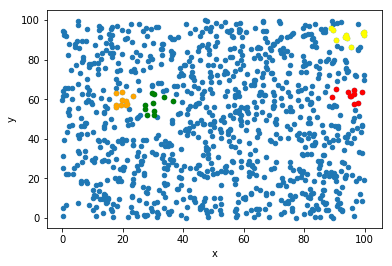

In [25]:
ax = df.plot( kind='scatter', x='x', y='y' )
df.iloc[ indices[0] ].plot( kind='scatter', x='x', y='y', ax=ax, color='red' )
df.iloc[ indices[100] ].plot( kind='scatter', x='x', y='y', ax=ax, color='yellow' )
df.iloc[ indices[200] ].plot( kind='scatter', x='x', y='y', ax=ax, color='green' )
df.iloc[ indices[300] ].plot( kind='scatter', x='x', y='y', ax=ax, color='orange' )

In [26]:
plt.show()

In [27]:
indices_df = pd.DataFrame( indices, columns=['n0', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9'] )
df_new = pd.concat( [df, indices_df], axis=1 )

In [28]:
df_new.head()

,x,y,n0,n1,n2,n3,n4,n5,n6,n7,n8,n9
0,95.096551,61.817095,0,239,156,775,652,888,342,979,59,141
1,93.121919,27.926430,1,256,547,395,892,30,393,671,851,333
2,75.813842,82.318283,2,135,36,666,659,202,773,793,470,903
3,78.188404,39.974026,3,929,667,689,494,927,212,285,744,407
4,84.024199,86.419839,4,61,440,327,883,608,202,957,700,703


In [29]:
from sklearn.datasets import load_iris
import pandas as pd

iris= load_iris() 
X = iris.data     
y = iris.target 

iris_data = pd.DataFrame(X, columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
iris_target = pd.DataFrame(y, columns=['Species'])

def flower(num):
    if num == 0:
        return 'Setosa'
    elif num == 1:
        return 'Veriscolour'
    else:
        return 'Virginica'

iris_target['Species'] = iris_target['Species'].apply(flower)
iris = pd.concat([iris_data, iris_target], axis=1)

import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3) 

knn = KNeighborsClassifier(n_neighbors=3) 
knn.fit(X_train, y_train) 
knn.score(X_test,y_test)

0.9333333333333333

In [30]:
y_pred = knn.predict(X_test)
y_pred

array([1, 1, 2, 1, 1, 1, 0, 2, 0, 2, 2, 2, 1, 2, 0, 0, 2, 1, 1, 2, 1, 0,
       1, 2, 2, 2, 2, 0, 1, 0, 0, 0, 2, 0, 2, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       2])

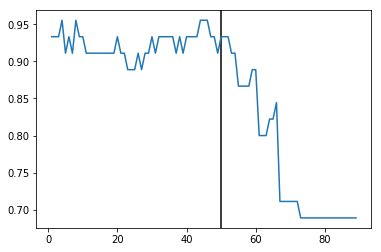

In [33]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

knn_accuracy = []

for k in range(1, 90):
    knn = KNeighborsClassifier(n_neighbors=k) 
    knn.fit(X_train, y_train)                 
    y_pred = knn.predict(X_test)              
    knn_accuracy.append(metrics.accuracy_score(y_test, y_pred)) 

k_range = range(1,90)

plt.axvline(50,color='k')
plt.plot(k_range, knn_accuracy)
plt.show()

In [32]:
knn_accuracy

[0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9555555555555556,
 0.9111111111111111,
 0.9333333333333333,
 0.9111111111111111,
 0.9555555555555556,
 0.9333333333333333,
 0.9333333333333333,
 0.9111111111111111,
 0.9111111111111111,
 0.9111111111111111,
 0.9111111111111111,
 0.9111111111111111,
 0.9111111111111111,
 0.9111111111111111,
 0.9111111111111111,
 0.9111111111111111,
 0.9333333333333333,
 0.9111111111111111,
 0.9111111111111111,
 0.8888888888888888,
 0.8888888888888888,
 0.8888888888888888,
 0.9111111111111111,
 0.8888888888888888,
 0.9111111111111111,
 0.9111111111111111,
 0.9333333333333333,
 0.9111111111111111,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9111111111111111,
 0.9333333333333333,
 0.9111111111111111,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9555555555555556,
 0.9555555555555556,
 0.9555555555555556,
 0.9333333333333333,
 0.9333333333